In [2]:
"""
https://en.wikipedia.org/wiki/Exponential_function
http://igraph.org/python/doc/igraph.GraphBase-class.html#get_edgelist
https://en.wikipedia.org/wiki/Exponential_function#/media/File:Exp.svg
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import igraph as ig
import random
from decimal import *
from math import sqrt
from math import pow
from math import exp
from math import log
import pickle

In [3]:
g = ig.Graph()
g.add_vertices(16)
g.add_edges([(0, 1),(1, 2),(2, 3), (4, 5),(5, 6),(6, 7), (8, 9),(9, 10),(10, 11),(12, 13),(13, 14),(14, 15)])
g.add_edges([(0, 4),(4, 8),(8, 12),(1, 5),(5, 9),(9, 13),(2, 6),(6, 10),(10, 14),(3, 7),  (7, 11), (11, 15)])
ml = g.layout('grid')
m = [[Decimal(m[0]), Decimal(m[1])] for m in ml]

In [103]:
c = getcontext()
c.traps[FloatOperation] = False
#c.prec = 64
c.rounding=ROUND_DOWN

q =[]
for e in g.get_edgelist():
    pa, pb = m[e[0]], m[e[1]]
    dist = Decimal.sqrt((Decimal(pa[0])-Decimal(pb[0]))**2 + (Decimal(pa[1])-Decimal(pb[1]))**2)
    q.append(dist)
q.sort()
for _ in q:
    print(_)

1
1
1
1
1
1.414213562373095048801688724209698078569671875376948073176679738
1.414213562373095048801688724209698078569671875376948073176679738
1.414213562373095048801688724209698078569671875376948073176679738
1.414213562373095048801688724209698078569671875376948073176679738
2
2
2
2
2.236067977499789696409173668731276235440618359611525724270897245
2.236067977499789696409173668731276235440618359611525724270897245
2.236067977499789696409173668731276235440618359611525724270897245
2.236067977499789696409173668731276235440618359611525724270897245
2.236067977499789696409173668731276235440618359611525724270897245
2.828427124746190097603377448419396157139343750753896146353359476
3
3
3.162277660168379331998893544432718533719555139325216826857504853
3.605551275463989293119221267470495946251296573845246212710453056
3.605551275463989293119221267470495946251296573845246212710453056


In [106]:
def search(kk, steps):
    book = []
    k = kk ** 2
    index = range(len(m))
    book = []
    # Randomize
    for i in range(20):
        a, b = random.sample(index, 2)
        m[a], m[b] = m[b], m[a]
    # Search
    accepted = 0
    improved = 0
    best = float(1000)
    best_i = steps
    for i in range(steps):
        a, b = random.sample(index, 2)
        m[a], m[b] = m[b], m[a]
        L = float(0)
        for e in g.get_edgelist():
            pa, pb = m[e[0]], m[e[1]]
            dist = Decimal.sqrt((Decimal(pa[0])-Decimal(pb[0]))**2 + (Decimal(pa[1])-Decimal(pb[1]))**2)
            L = L + float(dist)
        if L > best:
            T =  Decimal(1)-(Decimal(i)/(Decimal(steps)))
            delta = Decimal(L - best)
            # As we approach the end of the search
            # T is at it's largest
            # -delta / ( k * T ) is a smaller, negative number
            # thus z becomes closer to one
            # and the chance that a random number between 0 and 1
            # is larger than z diminish accordingly
            # as the liklihood of accepting a bad move
            # Increasing the size of the constant k
            # also decreases -delta / ( k * T )
            # generally dimishing the liklihood of accepting a bad move
            z = exp(-delta / ( k * T )) 
            r = random.random()
            if z < r:
                # Reject
                m[a], m[b] = m[b], m[a]
            else:
                # Accept
                accepted = accepted + 1
                best = L
                best_i = i
        else:
            # Improvement
            best = L
            improved = improved + 1
            best = L
    return (kk, best_i, best, improved, accepted)

def collect(k):
    measures = []
    runs = 10
    r = []
    for k in K:
        for search_steps in range(1,500+1):
            if search_steps % 100 == 0:
                print(search_steps)
            for run in range(runs):
                r.append(search(k, search_steps))
    return r

#K = [Decimal(1)/Decimal(100),  Decimal(1)/Decimal(10), Decimal(0), Decimal(1), Decimal(2)]

K = [Decimal(1)/Decimal(10), Decimal(2)]


results = collect(K)
v = [v[2] for v in results]
print(round(np.min(v),4), round(np.mean(v),4), round(np.max(v),4))
v = None

100
200
300
400
500
100
200
300
400
500
24.0 35.5729 60.5587


In [13]:
pickle.dump([ r[1:2] for r in results if r[0]<1], open('r1.p', 'wb'))
pickle.dump([ r[1:2] for r in results if r[0]>1], open('r2.p', 'wb'))

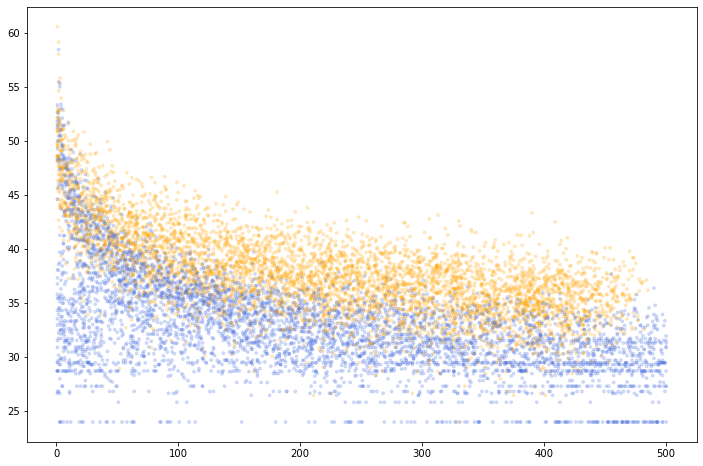

In [107]:
mr = [m for m in results]
random.shuffle(mr)
x = [row[1] for row in mr]
y = [round(row[2],6) for row in mr]
c = [row[0] for row in mr]

plt.rcParams['figure.figsize'] = [12, 8]
cm = mpl.colors.ListedColormap(['royalblue', 'orange'])
plt.scatter(x,y, c=c, cmap=cm, alpha=0.2, s=8)
plt.show()

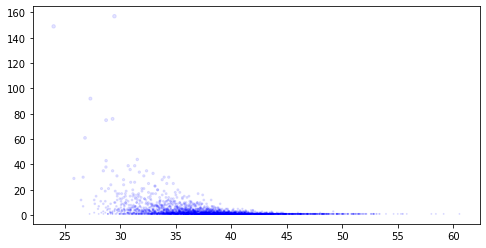

In [108]:
r ={}
for zz in [[_[1],_[2]] for _ in results]:
    i, v = zz
    vr = round(v,24)
    z = 1
    if vr in r:
        z = r[vr]
        z = z + 1
    r[vr] = z
    
x = [row[0] for row in r.items()]
y = [row[1] for row in r.items()]
s = [sqrt(row[1]) for row in r.items()]
c = ['blue' for row in r.items()]

plt.rcParams['figure.figsize'] = [8, 4]
cm = mpl.colors.ListedColormap(['royalblue', 'orange'])
plt.scatter(x,y, c=c, s=s, cmap=cm, alpha=0.1)
plt.show()

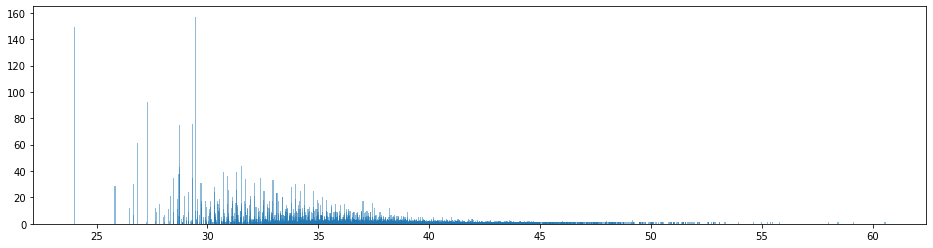

In [109]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.bar(x,y, width=0.05, alpha=0.5)
plt.show()

In [110]:
q = [_ for _ in list(r.keys()) if _ < 32]
print(len(q))
q.sort()
q[1000:1010]

264


[]